## Лабораторная_работа_№8_Машинное_обучение_ДПИ22_1с_Берникова_Валерия

# **Цель:**

Научиться применять основные методы кластеризации данных с использованием библиотеки Python.

# **Введение в кластеризацию данных:**

Кластеризация данных — это процесс разделения схожих объектов на группы (кластеры). Она широко используется в анализе данных для выявления структуры в данных, идентификации скрытых паттернов и многих других задач.

# **Основные методы кластеризации:**

1. K-means
2. DBSCAN
3. Hierarchical clustering

# **Загрузка данных:**

В качестве примера, давайте загрузим набор данных ирисов:

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

# **Применение метода кластеризации:**

K-means:

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

DBSCAN:

In [3]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

DBSCAN()

Hierarchical clustering:

In [4]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical.fit(X)

AgglomerativeClustering(n_clusters=3)

Визуализация результатов:

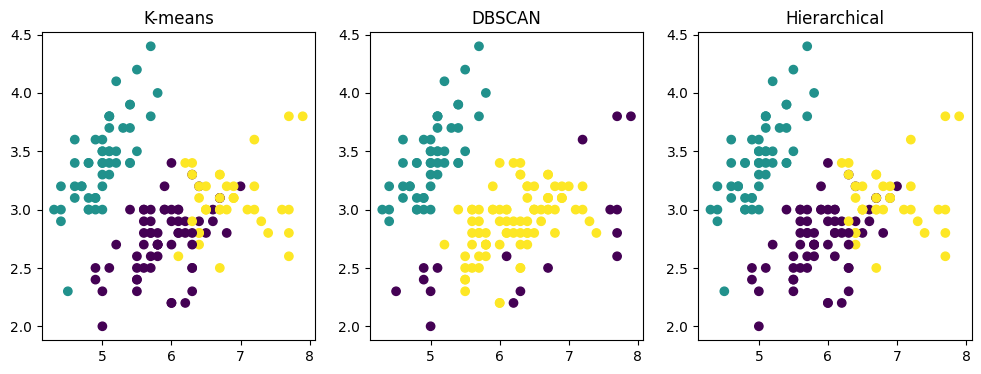

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means')

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN')

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=hierarchical.labels_, cmap='viridis')
plt.title('Hierarchical')

plt.show()


# **Задания для самостоятельного выполнения**

1. K-means кластеризация:

   Загрузите набор данных "Ирисы" (можно использовать функцию load_iris() из библиотеки sklearn.datasets). Примените алгоритм K-means для кластеризации данных. Визуализируйте полученные кластеры на плоскости, используя только два признака (например, длину и ширину лепестка). Попробуйте различное количество кластеров (2, 3, 4) и сравните результаты.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [2]:
# Загрузка данных "Ирисы"
iris = load_iris()
X = iris.data[:, [0, 1]]  # Используем только длину и ширину лепестка

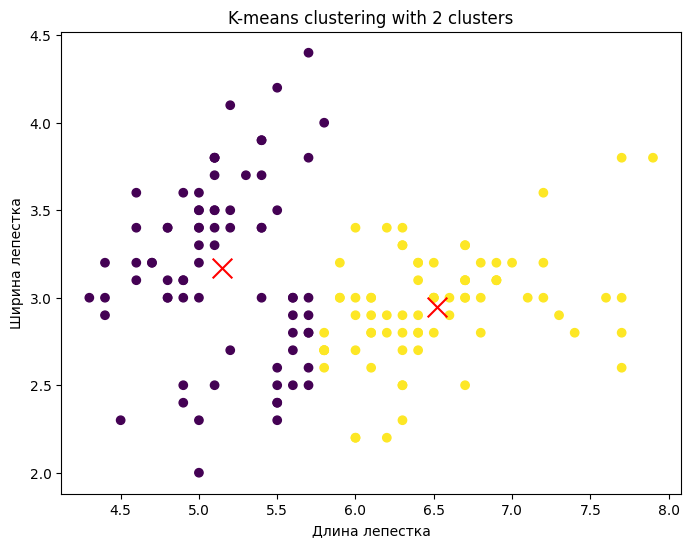

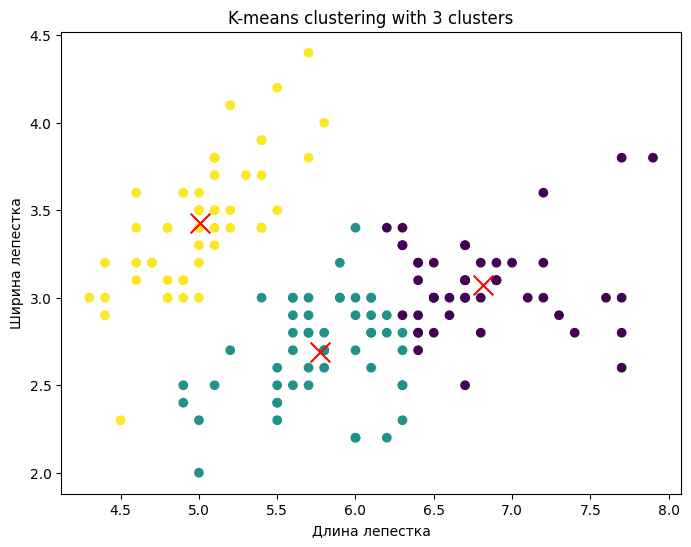

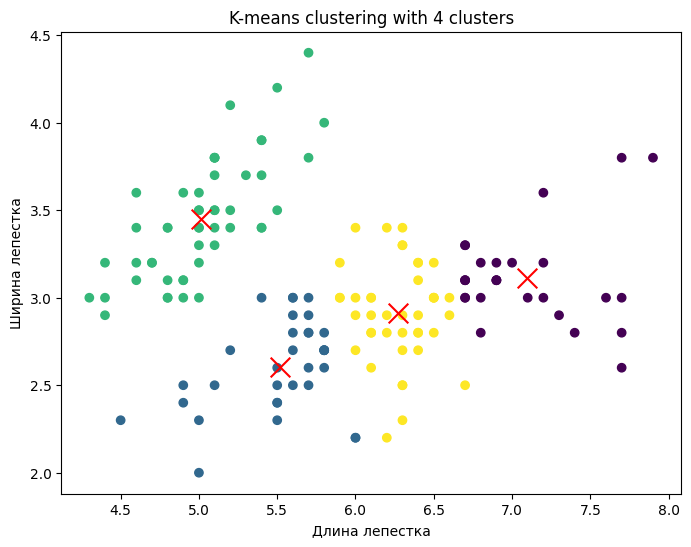

In [5]:
# Применение K-means для различного количества кластеров
for n_clusters in [2, 3, 4]:
    # Инициализация модели K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Обучение модели
    kmeans.fit(X)
    # Визуализация результатов
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red')
    plt.title(f'K-means clustering with {n_clusters} clusters')
    plt.xlabel('Длина лепестка')
    plt.ylabel('Ширина лепестка')
    plt.show()

2. DBSCAN кластеризация:

   Загрузите набор данных "Круги" (можно создать с помощью функции make_circles() из библиотеки sklearn.datasets). Примените алгоритм DBSCAN для кластеризации данных. Визуализируйте полученные кластеры на плоскости. Попробуйте различные значения параметров eps и min_samples и определите, как они влияют на результат кластеризации.


In [6]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

In [7]:
# Создание набора данных "Круги"
X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)

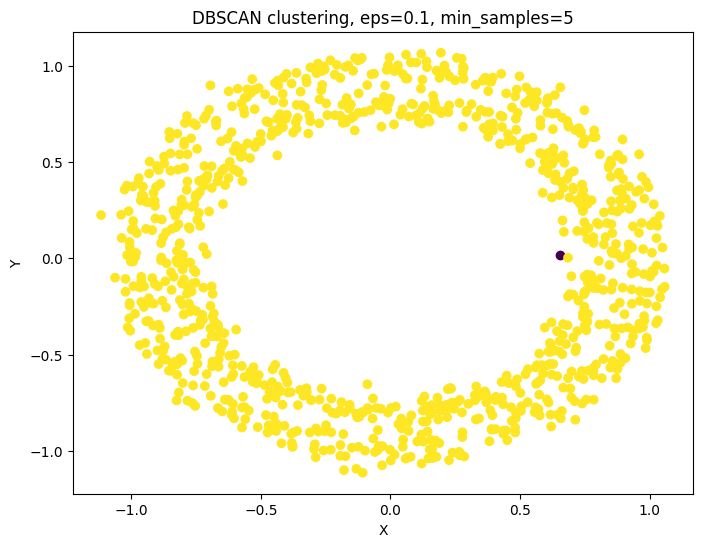

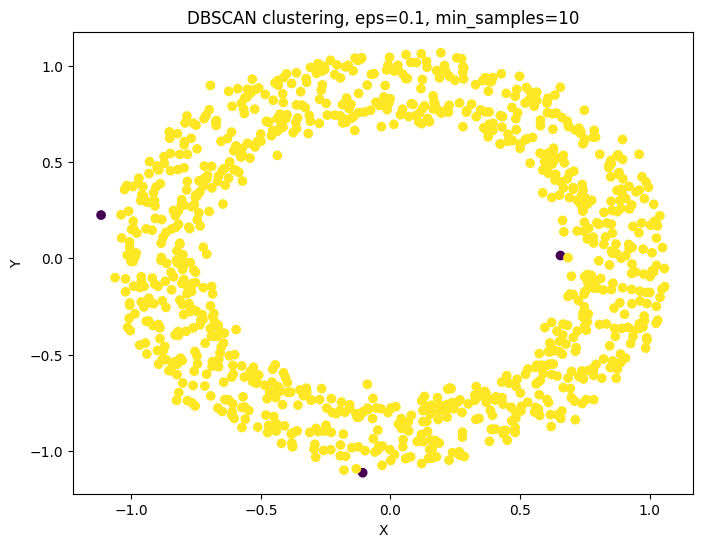

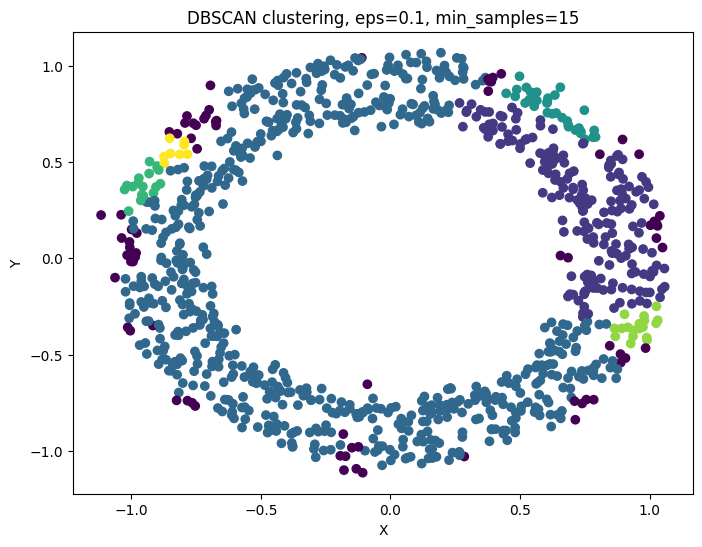

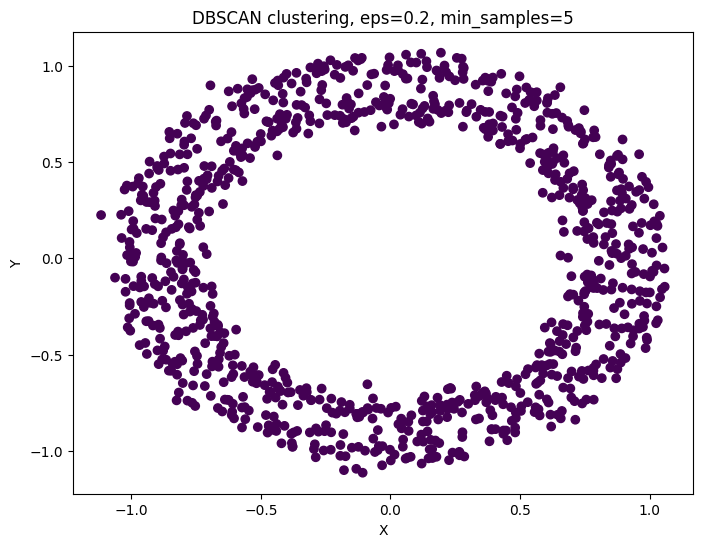

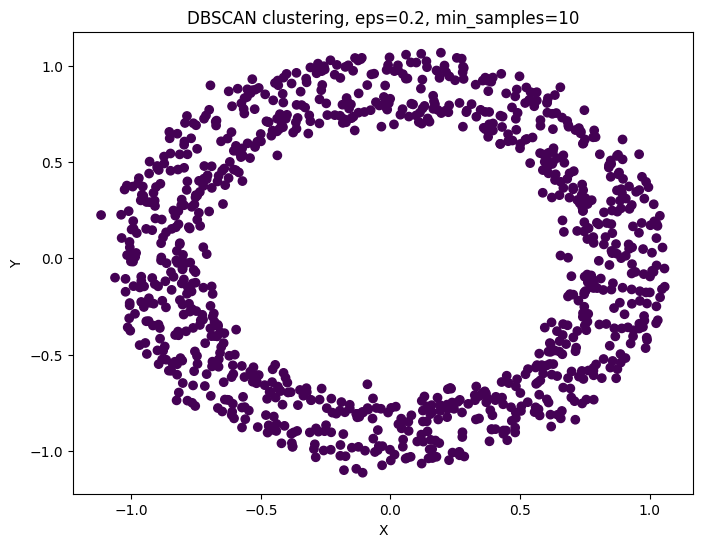

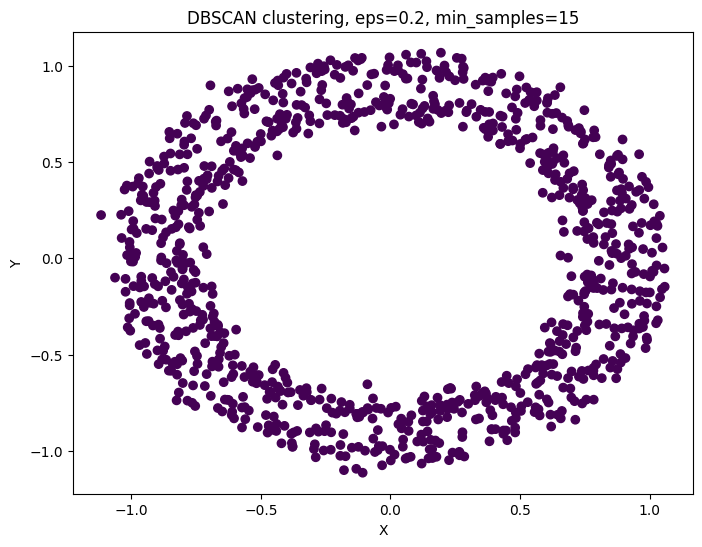

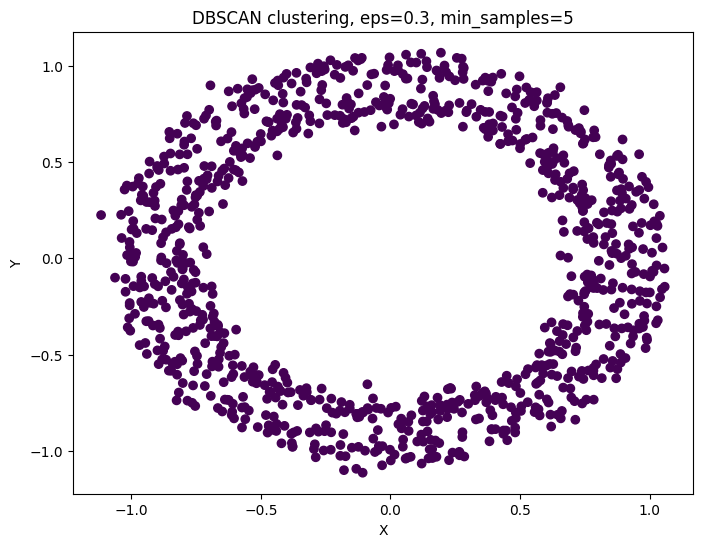

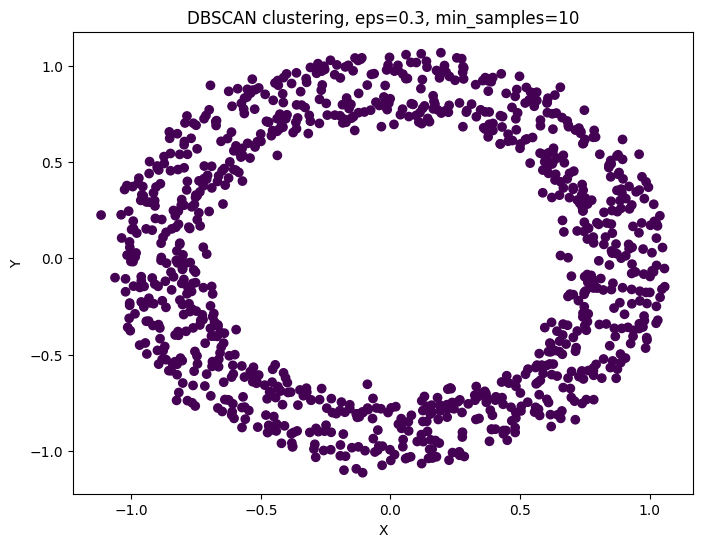

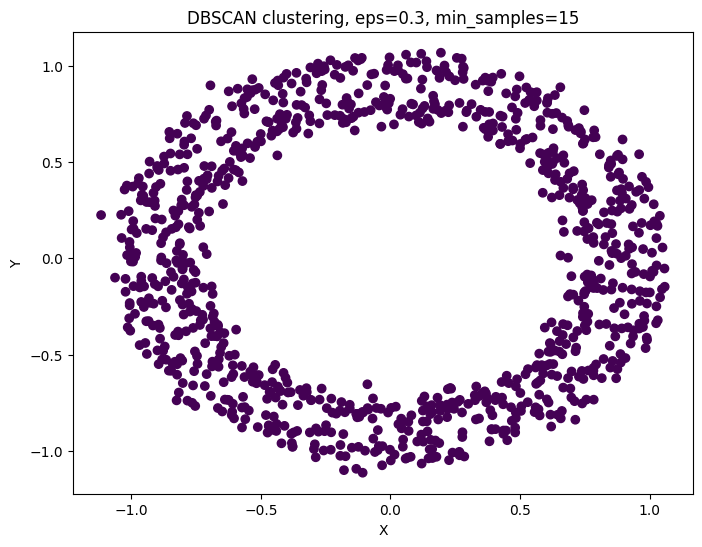

In [8]:
# Применение DBSCAN для различных значений параметров
for eps in [0.1, 0.2, 0.3]:
    for min_samples in [5, 10, 15]:
        # Инициализация модели DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        # Обучение модели
        dbscan.fit(X)
        
        # Визуализация результатов
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis')
        plt.title(f'DBSCAN clustering, eps={eps}, min_samples={min_samples}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()


3. Иерархическая кластеризация:

   Загрузите набор данных "Случайные точки" (можно создать с помощью функции make_blobs() из библиотеки sklearn.datasets). Примените иерархическую кластеризацию с помощью алгоритма AgglomerativeClustering. Визуализируйте дендрограмму полученных кластеров. Попробуйте различное количество кластеров и определите оптимальное число кластеров для данного набора данных.


In [40]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

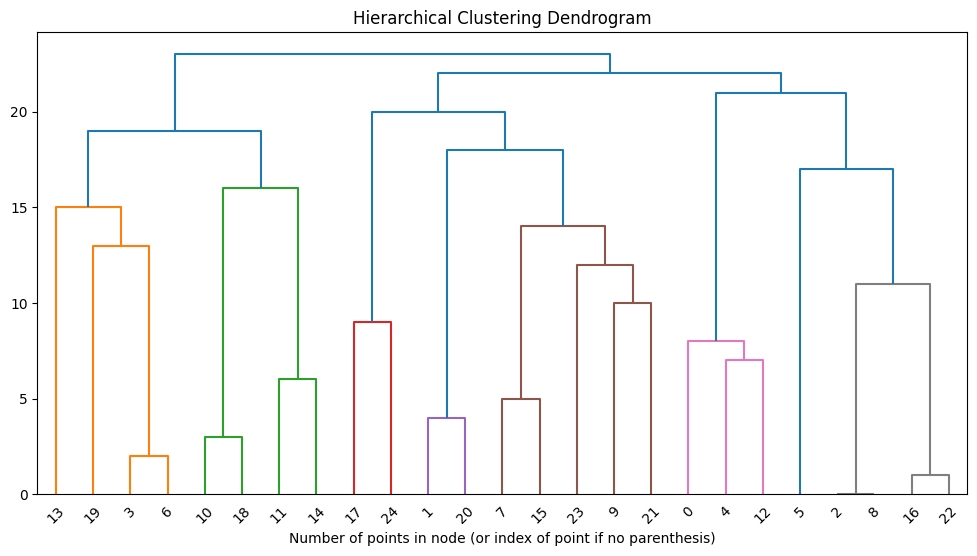

In [47]:
# Создание случайных точек
X, _ = make_blobs(n_samples=25, centers=3, cluster_std=1.0, random_state=42)

# Иерархическая кластеризация
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(X)

# Визуализация дендрограммы
def plot_dendrogram(model, **kwargs):
    # Создание дендрограммы с помощью scipy.cluster.hierarchy.dendrogram
    children = model.children_
    distance = np.arange(children.shape[0])
    no_of_observations = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    
    # Построение дендрограммы
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model)
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.show()

# Определение оптимального числа кластеров
# Из дендрограммы можно попробовать выбрать оптимальное число кластеров

4. Сравнение алгоритмов:

   Загрузите набор данных "Ирисы". Примените все три алгоритма кластеризации (K-means, DBSCAN, иерархическая) к этим данным. Сравните результаты кластеризации по метрикам, таким как индекс силуэта (можно использовать функцию silhouette_score() из sklearn.metrics). Определите, какой алгоритм лучше всего подходит для данного набора данных.

In [28]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [29]:
# Загрузка набора данных "Ирисы"
iris = load_iris()
X = iris.data

In [30]:
# K-means кластеризация
print("Выполняется K-means кластеризация...")
for n_clusters in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    print(f"Количество кластеров: {n_clusters}, Индекс силуэта: {score:.3f}")


Выполняется K-means кластеризация...
Количество кластеров: 2, Индекс силуэта: 0.681
Количество кластеров: 3, Индекс силуэта: 0.551
Количество кластеров: 4, Индекс силуэта: 0.498
Количество кластеров: 5, Индекс силуэта: 0.493


In [36]:
# DBSCAN кластеризация
print("\nВыполняется DBSCAN кластеризация...")
for eps in [0.3, 0.4, 0.5, 0.6]:
    for min_samples in [5, 10, 15, 20]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        labels = dbscan.labels_
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
            print(f"Эпсилон: {eps}, Минимальное количество образцов: {min_samples}, Индекс силуэта: {score:.3f}")


Выполняется DBSCAN кластеризация...
Эпсилон: 0.3, Минимальное количество образцов: 5, Индекс силуэта: -0.052
Эпсилон: 0.3, Минимальное количество образцов: 10, Индекс силуэта: 0.308
Эпсилон: 0.4, Минимальное количество образцов: 5, Индекс силуэта: 0.278
Эпсилон: 0.4, Минимальное количество образцов: 10, Индекс силуэта: 0.121
Эпсилон: 0.4, Минимальное количество образцов: 15, Индекс силуэта: 0.572
Эпсилон: 0.4, Минимальное количество образцов: 20, Индекс силуэта: 0.417
Эпсилон: 0.5, Минимальное количество образцов: 5, Индекс силуэта: 0.486
Эпсилон: 0.5, Минимальное количество образцов: 10, Индекс силуэта: 0.423
Эпсилон: 0.5, Минимальное количество образцов: 15, Индекс силуэта: 0.278
Эпсилон: 0.5, Минимальное количество образцов: 20, Индекс силуэта: 0.632
Эпсилон: 0.6, Минимальное количество образцов: 5, Индекс силуэта: 0.538
Эпсилон: 0.6, Минимальное количество образцов: 10, Индекс силуэта: 0.542
Эпсилон: 0.6, Минимальное количество образцов: 15, Индекс силуэта: 0.478
Эпсилон: 0.6, Мин

In [32]:
# Иерархическая кластеризация
print("\nВыполняется иерархическая кластеризация...")
for n_clusters in [2, 3, 4, 5]:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    agg_clustering.fit(X)
    labels = agg_clustering.labels_
    score = silhouette_score(X, labels)
    print(f"Количество кластеров: {n_clusters}, Индекс силуэта: {score:.3f}")


Выполняется иерархическая кластеризация...
Количество кластеров: 2, Индекс силуэта: 0.687
Количество кластеров: 3, Индекс силуэта: 0.554
Количество кластеров: 4, Индекс силуэта: 0.489
Количество кластеров: 5, Индекс силуэта: 0.484
